In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("construction-set/benchmark.csv") 
df

,Solving time (s),Number of nodes
0,10.917553,208
1,64.861714,1361
2,36.938093,756
3,55.146640,1043
4,32.781513,753
5,106.835633,1951
6,170.400794,3517
7,73.466432,1329
8,18.194386,329
9,15.752869,359


In [12]:
timecol = 'Solving time (s)'
numnodecol = 'Number of nodes'

In [198]:
df[timecol]

0      10.917553
1      64.861714
2      36.938093
3      55.146640
4      32.781513
5     106.835633
6     170.400794
7      73.466432
8      18.194386
9      15.752869
10    138.644187
11     36.962417
12     47.029744
13     12.781794
14     40.614638
15     22.078906
16      9.548763
17     67.368321
18      1.787736
19     67.141742
20     22.370454
21      7.853930
22     37.902562
23     10.550159
24     46.452884
25      5.562130
26     20.706832
27     14.586104
28     34.300107
29     87.390472
30     74.941127
31     11.570050
32     41.331209
33     27.892862
34     51.337024
35     40.522879
36     36.927615
37     31.088383
38      8.688432
39     42.973589
40      9.537738
41    167.317803
42     56.549889
43     69.623198
44     52.210738
45      9.917189
46    426.698503
47     35.388471
48     24.076392
49     19.526163
Name: Solving time (s), dtype: float64

In [237]:
model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

coefficient: 0.047577813170299535
intercept: 2.3632150046085556
0.9932381691032245
R^2: 0.9932381691032245
RMSE: 28.8960328621763


In [228]:
model.coef_

array([[0.04757781]])

(0, 459.6961699842654)

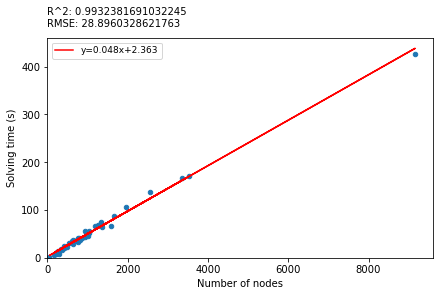

In [267]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax)
ax.plot(X, y_pred, 'r', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0,
         y = 1,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig("construction-set-spf")

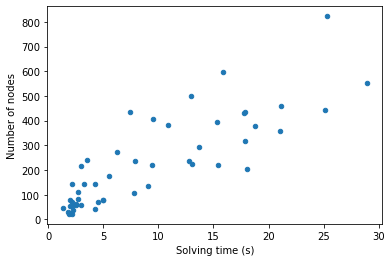

In [211]:
df1.plot.scatter(x=timecol, y=numnodecol)

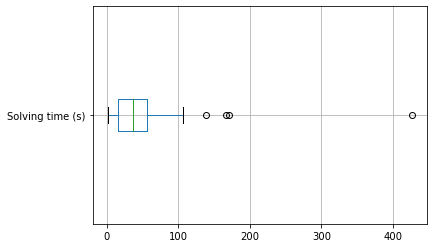

In [13]:
boxplot = df.boxplot(column=[timecol], vert=False)

In [7]:
df1 = pd.read_csv("construction-set-spf/benchmark.csv") 
df1

,Solving time (s),Number of nodes
0,2.745269,81
1,15.854128,598
2,9.099764,134
3,17.755315,429
4,2.253974,37
5,21.171370,459
6,15.433968,220
7,17.833907,434
8,2.565543,58
9,13.733407,293


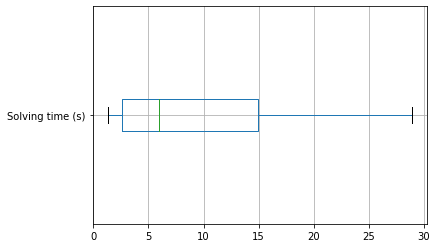

In [14]:
boxplot = df1.boxplot(column=[timecol], vert=False)

In [104]:
combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df

Solving time (s)  Number of nodes
M-RRT 0          10.917553              208
      1          64.861714             1361
      2          36.938093              756
      3          55.146640             1043
      4          32.781513              753
...                    ...              ...
SPF   45         18.013121              203
      46         15.282588              394
      47          2.544529               64
      48          7.833507              108
      49          9.441628              219

[100 rows x 2 columns]

In [105]:
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df

Solving time (s)  Number of nodes
Algorithm Run                                   
M-RRT     0           10.917553              208
          1           64.861714             1361
          2           36.938093              756
          3           55.146640             1043
          4           32.781513              753
...                         ...              ...
SPF       45          18.013121              203
          46          15.282588              394
          47           2.544529               64
          48           7.833507              108
          49           9.441628              219

[100 rows x 2 columns]

In [106]:
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,10.917553,208
1,M-RRT,1,64.861714,1361
2,M-RRT,2,36.938093,756
3,M-RRT,3,55.146640,1043
4,M-RRT,4,32.781513,753
...,...,...,...,...
95,SPF,45,18.013121,203
96,SPF,46,15.282588,394
97,SPF,47,2.544529,64
98,SPF,48,7.833507,108


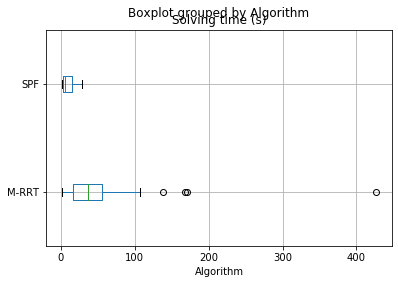

In [107]:
boxplot = combined_df.boxplot(column=[timecol], vert=False, by="Algorithm")

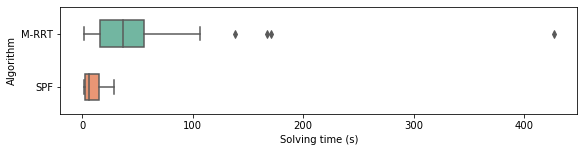

In [273]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig("construction-set-goalconfig-time.png")

In [280]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe())
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe())

M-RRT:
count     50.000000
mean      51.100975
std       66.034960
min        1.787736
25%       16.363248
50%       36.932854
75%       56.199077
max      426.698503
Name: Solving time (s), dtype: float64

SPF:
count    50.000000
mean      9.057484
std       7.543714
min       1.317413
25%       2.592100
50%       5.921126
75%      14.895293
max      28.914631
Name: Solving time (s), dtype: float64


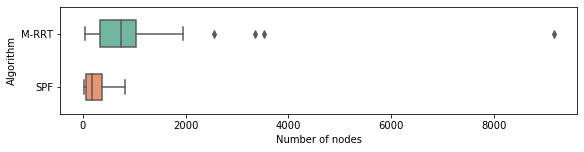

In [284]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig("construction-set-goalconfig-numnode.png")

In [281]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe())
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe())

M-RRT:
count      50.000000
mean     1024.380000
std      1383.235558
min        54.000000
25%       336.500000
50%       740.000000
75%      1040.750000
max      9154.000000
Name: Number of nodes, dtype: float64

SPF:
count     50.000000
mean     224.280000
std      183.111992
min       22.000000
25%       71.250000
50%      189.500000
75%      374.250000
max      823.000000
Name: Number of nodes, dtype: float64


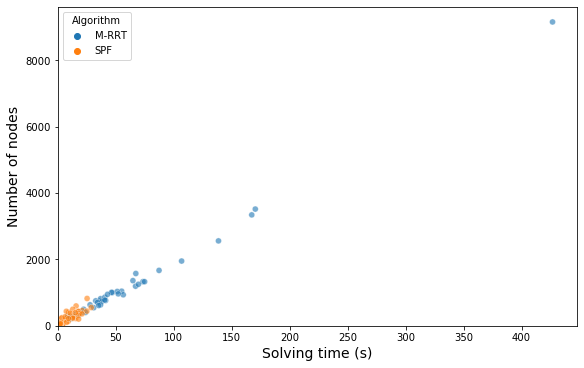

In [285]:
fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=timecol, y=numnodecol, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(timecol, fontsize=14)
ax.set_ylabel(numnodecol, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig("construction-set-goalconfig-scatter.png")

coefficient: 0.047577813170299535
intercept: 2.3632150046085556
0.9932381691032245
R^2: 0.9932381691032245
RMSE: 28.8960328621763


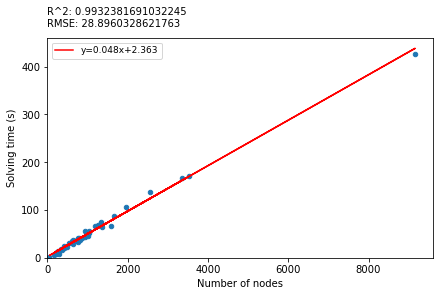

In [282]:
algorithm = "M-RRT"
df = combined_df[combined_df["Algorithm"] == algorithm]

model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax)
ax.plot(X, y_pred, 'r', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0,
         y = 1,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig(f"construction-set-{algorithm}-numnode-vs-time.png")

coefficient: 0.03457586358149627
intercept: 1.302809275942015
0.7043834957984239
R^2: 0.7043834957984239
RMSE: 16.486377035309424


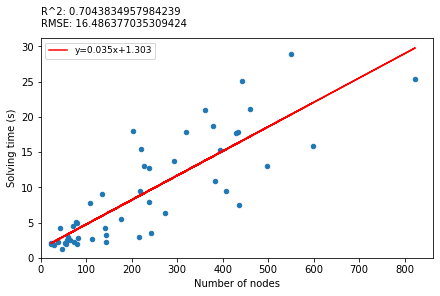

In [283]:
algorithm = "SPF"
df = combined_df[combined_df["Algorithm"] == algorithm]

model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax)
ax.plot(X, y_pred, 'r', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0,
         y = 1,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig(f"construction-set-{algorithm}-numnode-vs-time.png")